# A Tidyverse Approach to Alpha, Beta and Gamma Diversities

## Computed and Visualized Using Formulas and Using the Package `vegetarian`

### Amir Barghi

# The Formulas

For the formulas used in this file, see the following articles:

- L. Jost, "Entropy and diversity", *Oikos*, vol. 113, pp. 363--375, Jan. 2006.
- L. Jost, "Partitioning diversity into independent alpha and beta components", *Ecology*, vol. 88, pp. 2427--2439, Oct. 2008. 

# Loading Packages

In [1]:
library(vegetarian)

library(tidyverse)

library(latex2exp)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# about the vegetarian package
?vegetarian

# Loading the Data Set `vegetarian::simesants`

In [3]:
data(simesants)

In [4]:
df <- simesants

# Tidying the Data Set

In [5]:
# adding a new column `Weight`
# `Weight` is the proportion of the total population in each `Habitat`
df <- df %>% 
  rowwise() %>% 
  mutate(Count = sum(c_across(where(is.numeric)))) %>%
  ungroup()

df <- df %>% 
  mutate(Total_Count = sum(Count))

df <- df %>% 
  mutate(Weight = Count / Total_Count)

df <- df %>% 
  select(Habitat, Weight, everything(), -Count, -Total_Count)

df

Habitat,Weight,Acasub,Aphrud,Camher,Campen,Crecer,Crelin,Dolpla,Dolpus,⋯,Lasspe,Lasumb,Myrpun,Myrscu,Myrsmi,Stebre,Steimp,Stesch,Tapses,Temlon
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Hemlock,0.2535211,0,191,0,5,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Hardwood,0.2381562,3,132,0,16,0,0,0,0,⋯,0,2,0,0,0,0,4,1,0,2
Hardwood_Pine_Swamp,0.1306018,0,24,8,2,1,1,10,7,⋯,0,32,0,1,1,0,1,0,3,0
Hardwood_Rocky_Slope,0.1382843,0,74,0,1,0,0,0,0,⋯,0,1,0,0,0,0,0,0,1,1
White_Pine,0.2394366,0,102,0,16,0,0,0,0,⋯,7,11,8,0,0,8,0,0,3,4


In [6]:
var_names <- df %>% 
  select(-Habitat, -Weight) %>% names() 

DF <- df %>% 
  gather(all_of(var_names), key = 'Species', value = 'Count') %>% 
  filter(Count > 0) %>%
  select(Habitat, Species, everything())

DF # gathered data set, with zero counts removed

Habitat,Species,Weight,Count
<fct>,<chr>,<dbl>,<int>
Hardwood,Acasub,0.2381562,3
Hemlock,Aphrud,0.2535211,191
Hardwood,Aphrud,0.2381562,132
Hardwood_Pine_Swamp,Aphrud,0.1306018,24
Hardwood_Rocky_Slope,Aphrud,0.1382843,74
White_Pine,Aphrud,0.2394366,102
Hardwood_Pine_Swamp,Camher,0.1306018,8
Hemlock,Campen,0.2535211,5
Hardwood,Campen,0.2381562,16


In [7]:
# number of habitats or communities
N <- DF %>% select(Habitat) %>% unique() %>% nrow()

# Gamma Diversities 

### Unweighted Gamma Diversities Computed Using Fromulas and Using `vegetarian::d`

In [8]:
giml_df <- DF %>% 
  group_by(Habitat) %>% 
  mutate(Habitat_Pop = sum(Count)) %>% 
  ungroup()

giml_u_m <- giml_df %>% 
  mutate(Total_Pop = sum(Count), 
         Prop = Count / Habitat_Pop, 
         Weight = 1 / N)

giml_u_m <- giml_u_m %>% 
  select(-Habitat) %>%
  group_by(Species) %>%
  mutate(Weighted_Prop = sum(Prop * Weight)) %>% 
  ungroup() %>%
  select(Species, Weighted_Prop) %>%
  unique()

giml_u_m <- giml_u_m %>% 
  summarise(Gamma_Richness = n(),
            Gamma_Shannon = exp(-sum(Weighted_Prop * log(Weighted_Prop))),
            Gamma_Greenberg = 1 / sum(Weighted_Prop ** 2))

giml_u_m

giml_u_v <- df %>% 
  summarise(Gamma_Richness = d(.[, -c(1, 2)], lev = 'gamma', q = 0), 
            Gamma_Shannon = d(.[, -c(1, 2)], lev = 'gamma', q = 1), 
            Gamma_Greenberg = d(.[, -c(1, 2)], lev = 'gamma', q = 2))

giml_u_v

Gamma_Richness,Gamma_Shannon,Gamma_Greenberg
<int>,<dbl>,<dbl>
22,4.911149,2.440529


Gamma_Richness,Gamma_Shannon,Gamma_Greenberg
<dbl>,<dbl>,<dbl>
22,4.911149,2.440529


### Weighted Gamma Diversities Computed Using Fromulas and Using `vegetarian::d`

In [9]:
giml_w_m <- giml_df %>% 
  mutate(Total_Pop = sum(Count), 
         Prop = Count / Habitat_Pop, 
         Weight = Habitat_Pop / Total_Pop)

giml_w_m <- giml_w_m %>%  
  select(-Habitat) %>%
  group_by(Species) %>%
  mutate(Weighted_Prop = sum(Prop * Weight)) %>% 
  ungroup() %>%
  select(Species, Weighted_Prop) %>%
  unique()

giml_w_m <- giml_w_m %>% 
  summarise(Gamma_Richness = n(),
            Gamma_Shannon = exp(-sum(Weighted_Prop * log(Weighted_Prop))),
            Gamma_Greenberg = 1 / sum(Weighted_Prop ** 2))

giml_w_m

giml_w_v <- df %>% 
  summarise(Gamma_Richness = d(.[, -c(1, 2)], lev = 'gamma', wt = .$Weight, q = 0),
            Gamma_Shannon = d(.[, -c(1, 2)], lev = 'gamma', wt = .$Weight, q = 1),
            Gamma_Greenberg = d(.[, -c(1, 2)], lev = 'gamma', wt = .$Weight, q = 2))

giml_w_v

Gamma_Richness,Gamma_Shannon,Gamma_Greenberg
<int>,<dbl>,<dbl>
22,4.321388,2.172605


Gamma_Richness,Gamma_Shannon,Gamma_Greenberg
<dbl>,<dbl>,<dbl>
22,4.321388,2.172605


# Alpha Diversities 

### Unweighted Alpha Diversities Computed Using Fromulas and Using `vegetarian::d`

In [10]:
alep_df <- DF %>% mutate(Total_Pop = sum(Count))

alep_u_m <- alep_df %>% 
  group_by(Habitat) %>% 
  mutate(Pop = sum(Count), 
         Prop = Count / Pop,
         Total_Prop = Count / Total_Pop,
         Weight = 1 / N)

suppressMessages(alep_u_m <- alep_u_m %>% 
                   summarise(Richness = n(), 
                             Shannon = -sum(Prop * log(Prop)),
                             Greenberg = sum(Prop ** 2)) %>%
                   ungroup() %>% 
                   unique())

alep_u_m <- alep_u_m %>% 
  summarise(Alpha_Richness = mean(Richness), 
            Alpha_Shannon = exp(mean(Shannon)), 
            Alpha_Greenberg = 1 / mean(Greenberg))

alep_u_m

alep_u_v <- df %>% 
  summarise(Alpha_Richness = d(.[, -c(1, 2)], lev = 'alpha', q = 0), 
            Alpha_Shannon = d(.[, -c(1, 2)], lev = 'alpha', q = 1), 
            Alpha_Greenberg = d(.[, -c(1, 2)], lev = 'alpha', q = 2))

alep_u_v

Alpha_Richness,Alpha_Shannon,Alpha_Greenberg
<dbl>,<dbl>,<dbl>
8.6,3.223582,2.013334


Alpha_Richness,Alpha_Shannon,Alpha_Greenberg
<dbl>,<dbl>,<dbl>
8.6,3.223582,2.013334


### Weighted Alpha Diversities Computed Using Fromulas and Using `vegetarian::d`

In [11]:
alep_df <- DF %>% mutate(Total_Pop = sum(Count))

alep_w_m <- alep_df %>% 
  group_by(Habitat) %>% 
  mutate(Habitat_Pop = sum(Count), 
         Prop = Count / Habitat_Pop,
         Weight = Habitat_Pop / Total_Pop,
         Richness = n(),
         Shannon = -sum(Prop * log(Prop)),
         Greenberg = sum(Prop ** 2)) %>%
  ungroup() %>%
  select(Habitat, 
         Richness, 
         Shannon, 
         Greenberg, 
         Habitat_Pop, 
         Total_Pop, 
         Weight) %>%
  unique()
        
suppressMessages(alep_w_m <- alep_w_m %>% 
                   summarise(Alpha_Richness = mean(Richness),
                             Alpha_Shannon = exp(sum(Shannon * Weight)),
                             Alpha_Greenberg = sum(Weight ** 2) / sum(Weight ** 2 * Greenberg )))

alep_w_m

alep_w_v <- df %>% 
  summarise(Alpha_Richness = d(.[, -c(1, 2)], lev = 'alpha', wt = .$Weight, q = 0), 
            Alpha_Shannon = d(.[, -c(1, 2)], lev = 'alpha', wt = .$Weight, q = 1),
            Alpha_Greenberg = d(.[, -c(1, 2)], lev = 'alpha', wt = .$Weight, q = 2))

alep_w_v

Alpha_Richness,Alpha_Shannon,Alpha_Greenberg
<dbl>,<dbl>,<dbl>
8.6,2.981991,1.769478


Alpha_Richness,Alpha_Shannon,Alpha_Greenberg
<dbl>,<dbl>,<dbl>
8.6,2.981991,1.769478


# Beta Diversities 

### Unweighted Beta Diversities Computed Using Fromulas and Using `vegetarian::d`

In [12]:
bet_u_m <- giml_u_m / alep_u_m 

names(bet_u_m) <- c('Beta_Richness', 'Beta_Shannon', 'Beta_Greenberg')

bet_u_v <- giml_u_v / alep_u_v

names(bet_u_v) <- c('Beta_Richness', 'Beta_Shannon', 'Beta_Greenberg')

bet_u_m

bet_u_v

Beta_Richness,Beta_Shannon,Beta_Greenberg
<dbl>,<dbl>,<dbl>
2.55814,1.523506,1.212183


Beta_Richness,Beta_Shannon,Beta_Greenberg
<dbl>,<dbl>,<dbl>
2.55814,1.523506,1.212183


In [13]:
# alternatively
beta_u_v <- df %>% 
  summarise(Beta_Richness = d(.[, -c(1, 2)], lev = 'beta', q = 0), 
            Beta_Shannon = d(.[, -c(1, 2)], lev = 'beta', q = 1), 
            Beta_Greenberg = d(.[, -c(1, 2)], lev = 'beta', q = 2))

beta_u_v

Beta_Richness,Beta_Shannon,Beta_Greenberg
<dbl>,<dbl>,<dbl>
2.55814,1.523506,1.212183


### Weighted Beta Diversities Computed Using Fromulas and Using `vegetarian::d`

In [14]:
bet_w_m <- giml_w_m / alep_w_m

names(bet_w_m) <- c('Beta_Richness', 'Beta_Shannon', 'Beta_Greenberg')

bet_w_v <- giml_w_v / alep_w_v

names(bet_w_v) <- c('Beta_Richness', 'Beta_Shannon', 'Beta_Greenberg')

bet_w_m

bet_w_v

Beta_Richness,Beta_Shannon,Beta_Greenberg
<dbl>,<dbl>,<dbl>
2.55814,1.449162,1.227822


Beta_Richness,Beta_Shannon,Beta_Greenberg
<dbl>,<dbl>,<dbl>
2.55814,1.449162,1.227822


In [15]:
# alternatively
beta_u_v <- df %>% 
  summarise(Beta_Richness = d(.[, -c(1, 2)], lev = 'beta', wt = .$Weight, q = 0), 
            Beta_Shannon = d(.[, -c(1, 2)], lev = 'beta', wt = .$Weight, q = 1), 
            Beta_Greenberg = d(.[, -c(1, 2)], lev = 'beta', wt = .$Weight, q = 2))

beta_u_v

Beta_Richness,Beta_Shannon,Beta_Greenberg
<dbl>,<dbl>,<dbl>
2.55814,1.449162,1.227822


# Visualizing Diversities

In [16]:
# defining two ranges: (0, 1) and (1, 10)
range_1 <- seq(0.001, 1, .01)

range_2 <- seq(1.001, 5, .01)

### Visualizing Unweighted Gamma Diversity Computed Using Fromulas

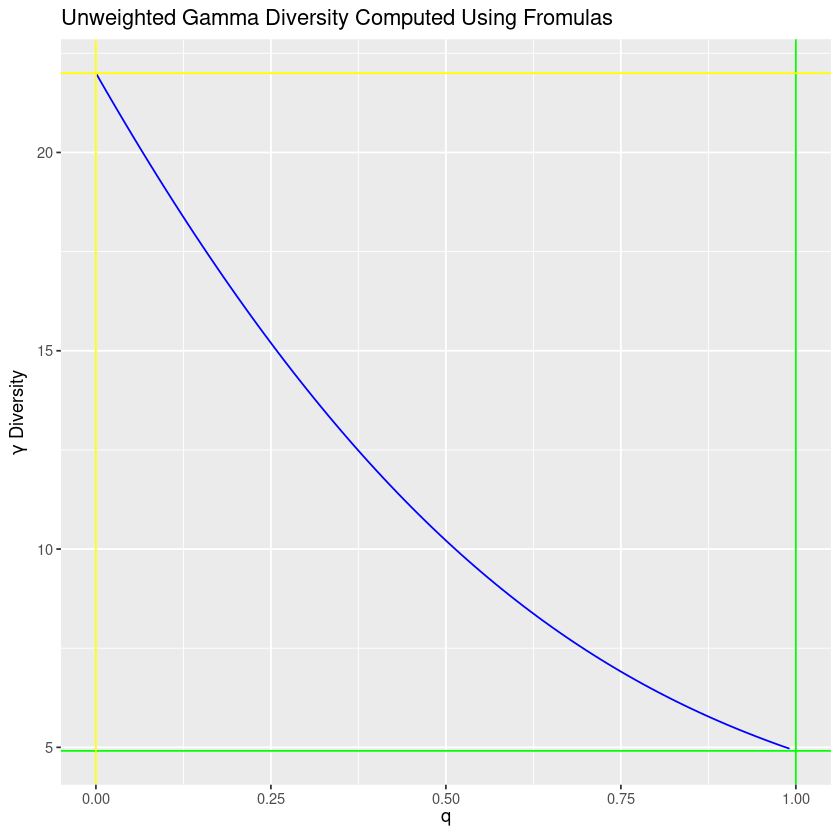

In [17]:
qsum1_g_u_m <- NULL

giml <- giml_df %>% 
  mutate(Total_Pop = sum(Count), 
         Prop = Count / Habitat_Pop, 
         Weight = 1 / N)

for (q in range_1) {
  
    df2 <- NULL
    
    df2 <- giml %>%  
      select(-Habitat) %>%
      group_by(Species) %>%
      mutate(Weighted_Prop = sum(Prop * Weight)) %>% 
      ungroup() %>%
      select(Species, Weighted_Prop) %>%
      unique()
    
    df2 <- df2 %>% 
      summarise(Giml_Manual = sum(Weighted_Prop ** q) ** (1/ (1 - q)), 
                q = q)
    
    qsum1_g_u_m <- rbind(qsum1_g_u_m, df2)
    
}

print(qsum1_g_u_m %>% 
        ggplot(aes(x = q, y = Giml_Manual)) + 
        geom_line( color = 'blue') +
        geom_hline(yintercept = giml_u_m$Gamma_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color= 'green') + 
        geom_hline(yintercept = giml_u_m$Gamma_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color= 'yellow') + 
        labs(title = 'Unweighted Gamma Diversity Computed Using Fromulas ') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\gamma$ Diversity'))) 

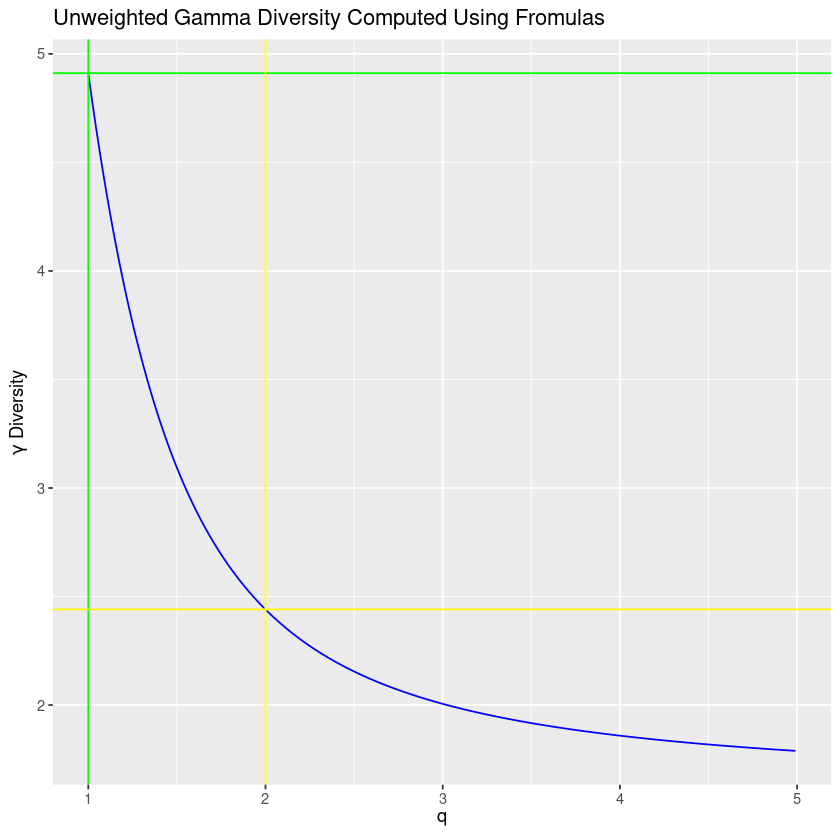

In [18]:
qsum2_g_u_m <- NULL

giml <- giml_df %>% 
  mutate(Total_Pop = sum(Count), 
         Prop = Count / Habitat_Pop,
         Weight = 1 / N)

for (q in range_2) {
  
    df2 <- NULL
    
    df2 <- giml %>%  
      select(-Habitat) %>%
      group_by(Species) %>%
      mutate(Weighted_Prop = sum(Prop * Weight)) %>% 
      ungroup() %>%
      select(Species, Weighted_Prop) %>%
      unique()
    
    df2 <- df2 %>% 
      summarise(Giml_Manual = sum(Weighted_Prop ** q) ** (1 / (1 - q)),
                q = q)
    
    qsum2_g_u_m <- rbind(qsum2_g_u_m, df2)
    
}

print(qsum2_g_u_m %>% 
        ggplot(aes(x = q, y = Giml_Manual)) + 
        geom_line( color = 'blue') +
        geom_hline(yintercept = giml_u_m$Gamma_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color= 'green') + 
        geom_hline(yintercept = giml_u_m$Gamma_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color= 'yellow') + 
        labs(title = 'Unweighted Gamma Diversity Computed Using Fromulas') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\gamma$ Diversity'))) 

### Visualizing Weighted Gamma Diversity Computed Using Fromulas

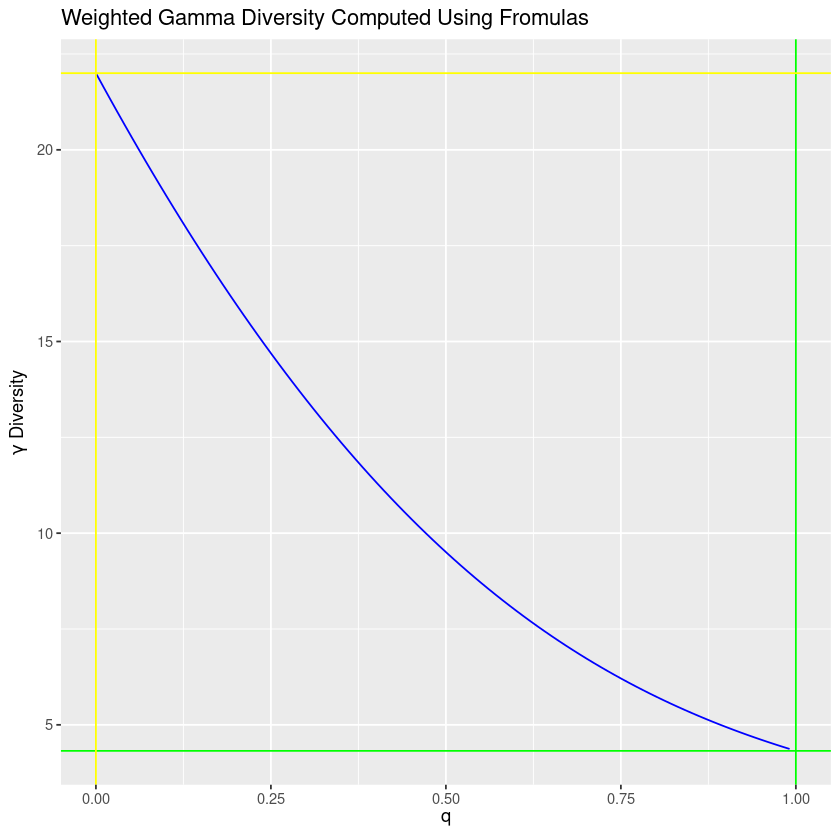

In [19]:
qsum1_g_w_m <- NULL

giml <- giml_df %>% 
  mutate(Total_Pop = sum(Count), 
         Prop = Count / Habitat_Pop, 
         Weight = Habitat_Pop / Total_Pop)

for (q in range_1) {
  
    df2 <- NULL
    
    df2 <- giml %>%  
      select(-Habitat) %>%
      group_by(Species) %>%
      mutate(Weighted_Prop = sum(Prop * Weight)) %>% 
      ungroup() %>%
      select(Species, Weighted_Prop) %>%
      unique()
    
    df2 <- df2 %>% 
      summarise(Giml_Manual = sum(Weighted_Prop ** q) ** (1/ (1 - q)), 
                q = q)
    
    qsum1_g_w_m <- rbind(qsum1_g_w_m, df2)
    
}

print(qsum1_g_w_m %>% 
        ggplot(aes(x = q, y = Giml_Manual)) + 
        geom_line( color = 'blue') +
        geom_hline(yintercept = giml_w_m$Gamma_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color= 'green') + 
        geom_hline(yintercept = giml_w_m$Gamma_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color= 'yellow') + 
        labs(title = 'Weighted Gamma Diversity Computed Using Fromulas ') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\gamma$ Diversity'))) 

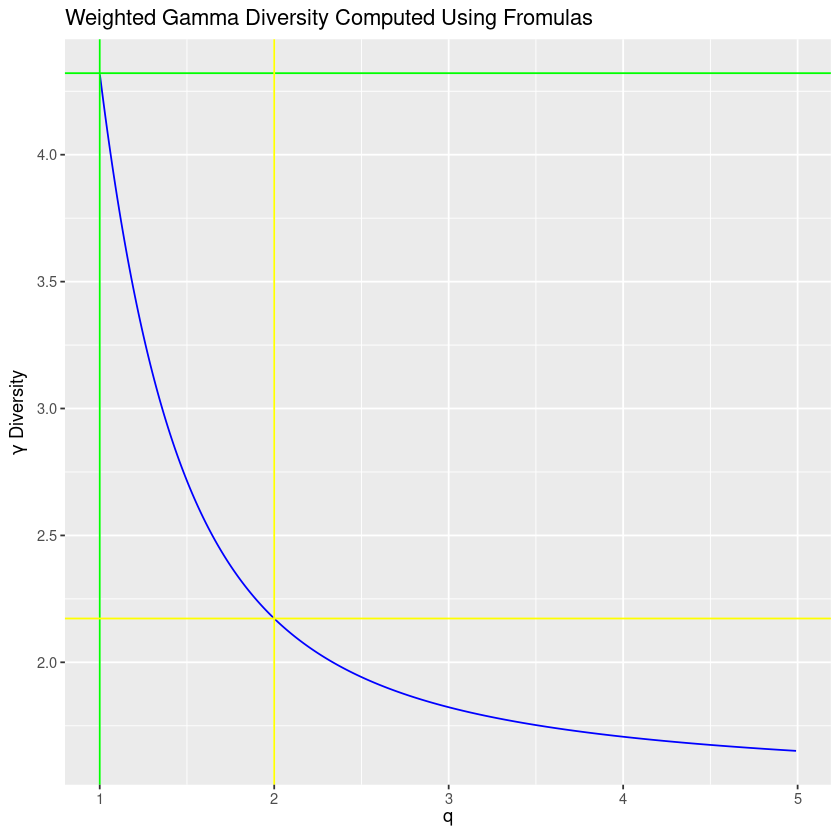

In [20]:
qsum2_g_w_m <- NULL

giml <- giml_df %>% 
  mutate(Total_Pop = sum(Count), 
         Prop = Count / Habitat_Pop, 
         Weight = Habitat_Pop / Total_Pop)

for (q in range_2) {
  
    df2 <- NULL
    
    df2 <- giml %>%  
      select(-Habitat) %>%
      group_by(Species) %>%
      mutate(Weighted_Prop = sum(Prop * Weight)) %>% 
      ungroup() %>%
      select(Species, Weighted_Prop) %>%
      unique()
    
    df2 <- df2 %>% 
      summarise(Giml_Manual = sum(Weighted_Prop ** q) ** (1 / (1 - q)),
                q = q)
    
    qsum2_g_w_m <- rbind(qsum2_g_w_m, df2)
    
}

print(qsum2_g_w_m %>% 
        ggplot(aes(x = q, y = Giml_Manual)) + 
        geom_line(color = 'blue') +
        geom_hline(yintercept = giml_w_m$Gamma_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color= 'green') + 
        geom_hline(yintercept = giml_w_m$Gamma_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color= 'yellow') + 
        labs(title = 'Weighted Gamma Diversity Computed Using Fromulas') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\gamma$ Diversity'))) 

### Visualizing Unweighted Gamma Diversity Computed Using `vegetarian::d`

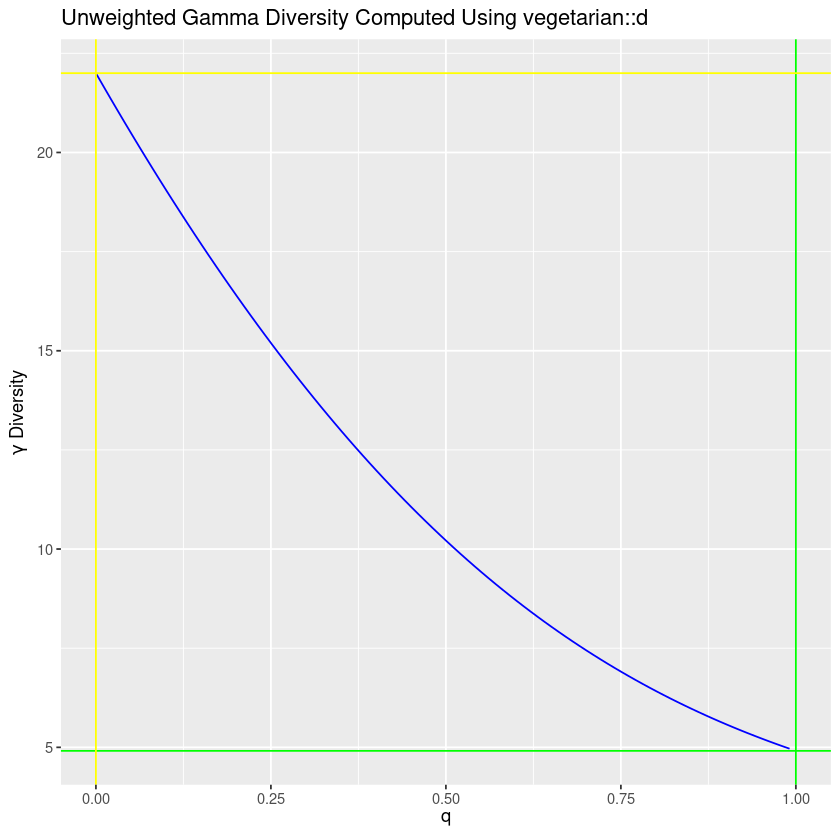

In [21]:
qsum1_g_u_v <- NULL

for (q in range_1) {
  
    df2 <- NULL
    
    df2 <- data.frame(d(df[, -c(1, 2)], lev = 'gamma', wt = 1 / N, q = q), q = q)
    
    names(df2) <- c('Giml_Vegetarian', 'q')
    
    qsum1_g_u_v <- rbind(qsum1_g_u_v, df2)
    
}

print(qsum1_g_u_v %>% 
        ggplot(aes(x = q, y = Giml_Vegetarian)) + 
        geom_line(color = 'blue') +
        geom_hline(yintercept = giml_u_v$Gamma_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color= 'green') + 
        geom_hline(yintercept = giml_u_v$Gamma_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color= 'yellow') + 
        labs(title = 'Unweighted Gamma Diversity Computed Using vegetarian::d') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\gamma$ Diversity'))) 

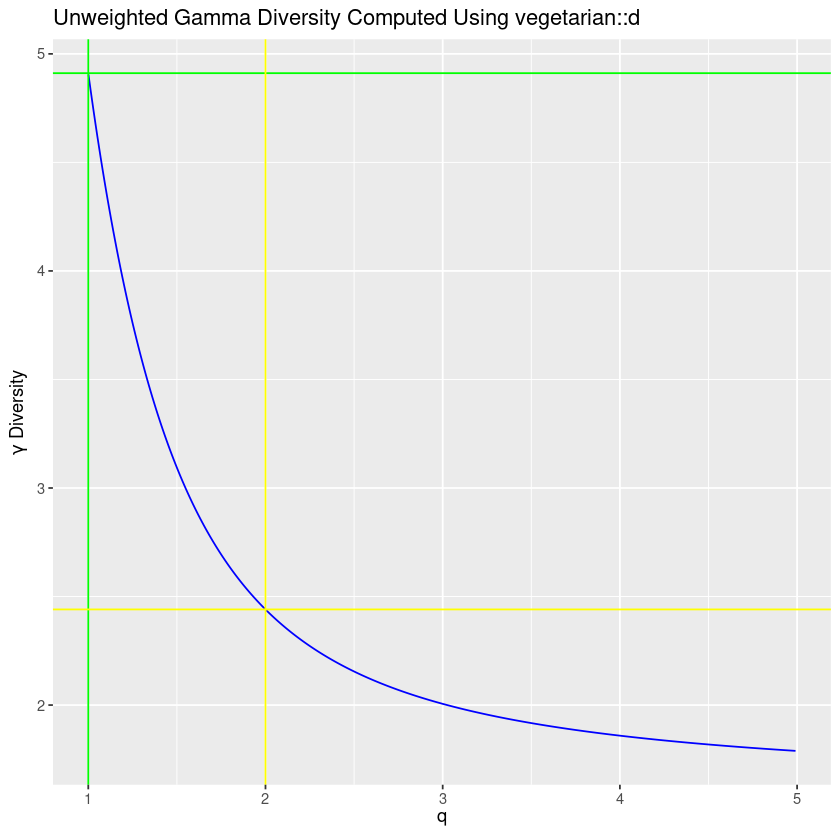

In [22]:
qsum2_g_u_v <- NULL

for (q in range_2) {
  
    df2 <- NULL
    
    df2 <- data.frame(d(df[, -c(1, 2)], lev = 'gamma', wt = 1 / N, q = q), q = q)
    
    names(df2) <- c('Giml_Vegetarian', 'q')
    
    qsum2_g_u_v <- rbind(qsum2_g_u_v, df2)
    
}

print(qsum2_g_u_v %>% 
        ggplot(aes(x = q, y = Giml_Vegetarian)) + 
        geom_line(color = 'blue') +
        geom_hline(yintercept = giml_u_v$Gamma_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color= 'green') + 
        geom_hline(yintercept = giml_u_v$Gamma_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color= 'yellow') + 
        labs(title = 'Unweighted Gamma Diversity Computed Using vegetarian::d') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\gamma$ Diversity'))) 

### Visualizing Weighted Gamma Diversity Computed Using `vegetarian::d`

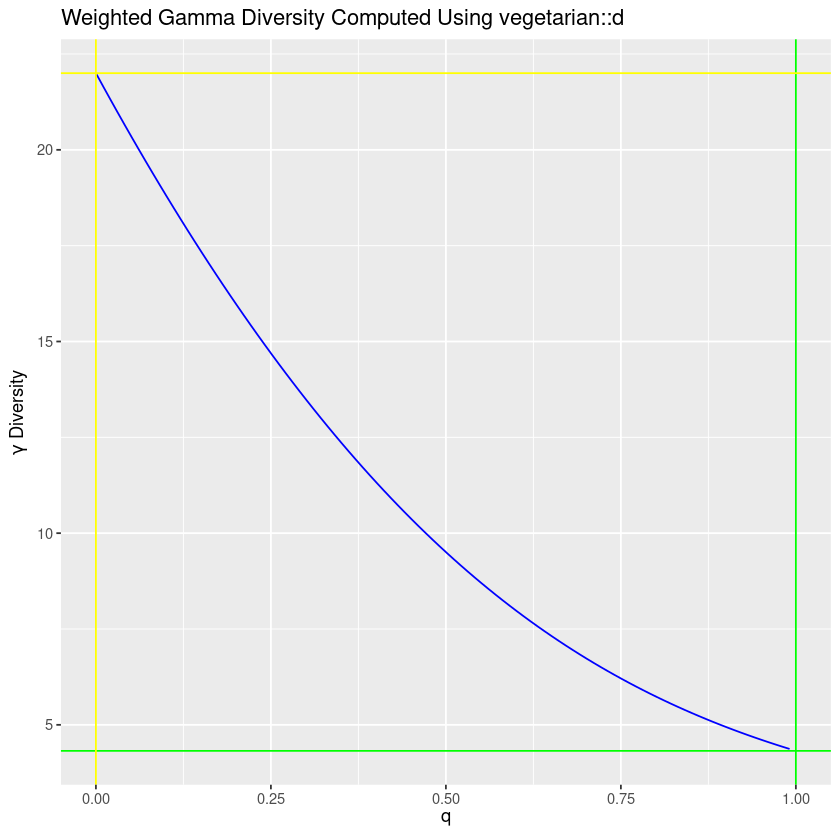

In [23]:
qsum1_g_w_v <- NULL

for (q in range_1) {
  
    df2 <- NULL
    
    df2 <- data.frame(d(df[, -c(1, 2)], lev = 'gamma', wt = df$Weight, q = q), q = q)
    
    names(df2) <- c('Giml_Vegetarian', 'q')
    
    qsum1_g_w_v <- rbind(qsum1_g_w_v, df2)
    
}

print(qsum1_g_w_v %>% 
        ggplot(aes(x = q, y = Giml_Vegetarian)) + 
        geom_line(color = 'blue') +
        geom_hline(yintercept = giml_w_v$Gamma_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color= 'green') + 
        geom_hline(yintercept = giml_w_v$Gamma_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color= 'yellow') + 
        labs(title = 'Weighted Gamma Diversity Computed Using vegetarian::d') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\gamma$ Diversity'))) 

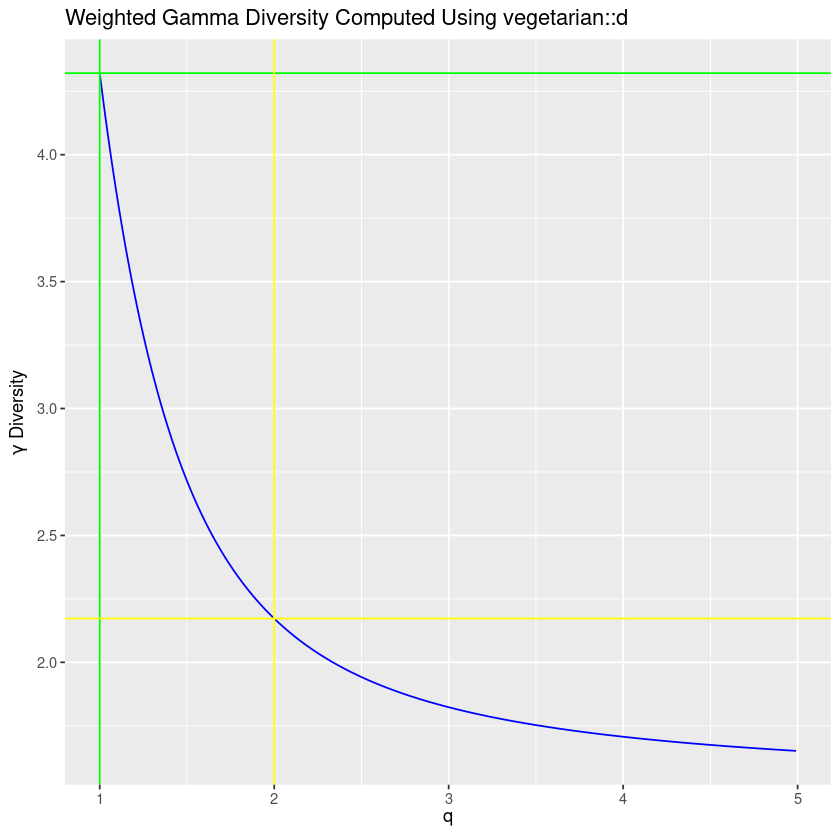

In [24]:
qsum2_g_w_v <- NULL

for (q in range_2) {
  
    df2 <- NULL
    
    df2 <- data.frame(d(df[, -c(1, 2)], lev = 'gamma', wt = df$Weight, q = q), q = q)
    
    names(df2) <- c('Giml_Vegetarian', 'q')
    
    qsum2_g_w_v <- rbind(qsum2_g_w_v, df2)
    
}

print(qsum2_g_w_v %>% 
        ggplot(aes(x = q, y = Giml_Vegetarian)) + 
        geom_line(color = 'blue') +
        geom_hline(yintercept = giml_w_v$Gamma_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color= 'green') + 
        geom_hline(yintercept = giml_w_v$Gamma_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color= 'yellow') + 
        labs(title = 'Weighted Gamma Diversity Computed Using vegetarian::d') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\gamma$ Diversity'))) 

In [25]:
alep <- DF %>% mutate(Total_Pop = sum(Count))

### Visualizing Unweighted Alpha Diversity Computed Using Fromulas

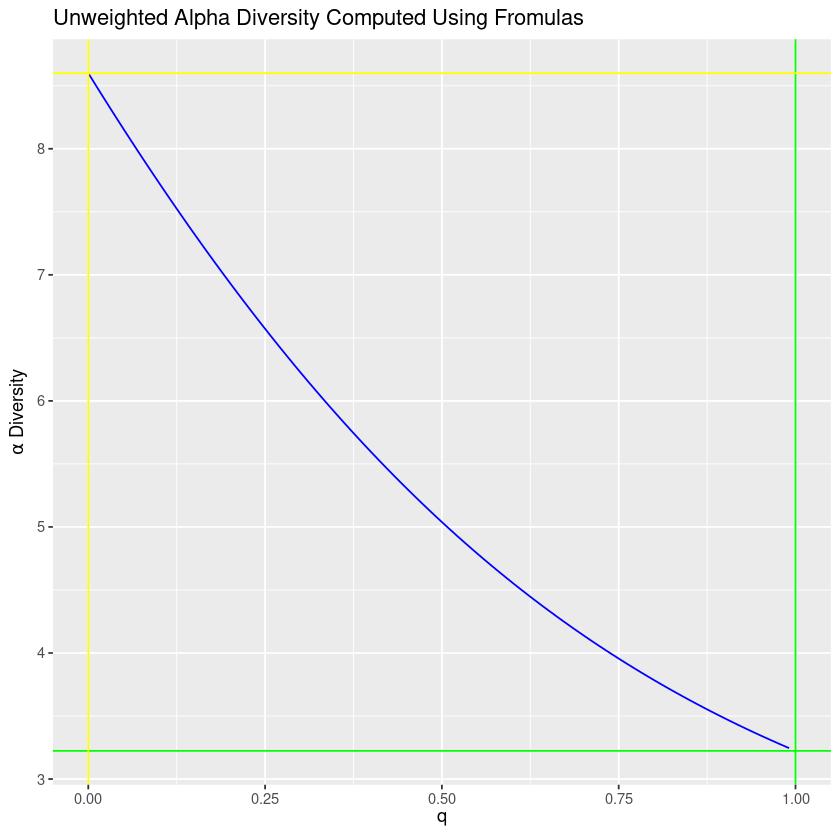

In [26]:
qsum1_a_u_m <- NULL

for (q in range_1) {
  
    df2 <- NULL

    df2 <- alep %>%
      group_by(Habitat) %>% 
      mutate(Habitat_Pop = sum(Count), 
             Prop = Count / Habitat_Pop,
             Weight = 1 / N,
             Smallqsum = sum((Prop * Weight) ** q),
             q = q) %>%
      ungroup() %>%
      select(Habitat, Smallqsum, Weight, q) %>%
      unique()
    
    suppressMessages(df2 <- df2 %>% 
                       group_by(q) %>% 
                       summarise(Alep_Manual = (sum(Smallqsum) / sum(Weight ** q)) ** (1 / (1 - q)), 
                                 q = q))
    
    qsum1_a_u_m <- rbind(qsum1_a_u_m, df2)
    
}

print(qsum1_a_u_m %>% 
        ggplot(aes(x = q, y = Alep_Manual)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = alep_u_m$Alpha_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = alep_u_m$Alpha_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color = 'yellow') + 
        labs(title = 'Unweighted Alpha Diversity Computed Using Fromulas ') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\alpha$ Diversity'))) 

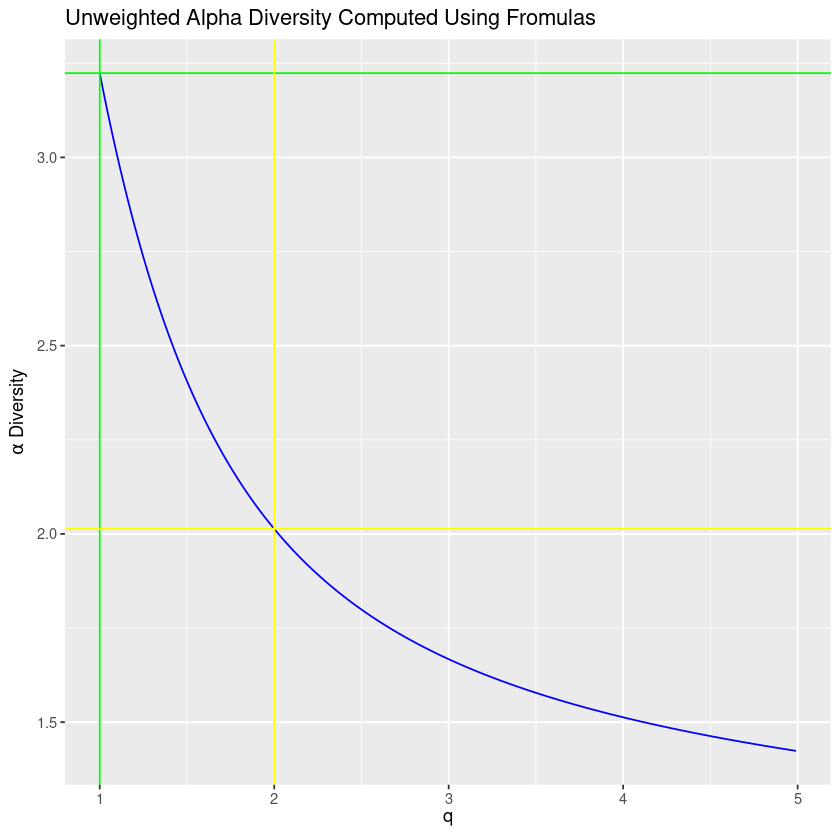

In [27]:
qsum2_a_u_m <- NULL

for (q in range_2) {
    
    df2 <- NULL
    
    df2 <- alep %>%
      group_by(Habitat) %>% 
      mutate(Habitat_Pop = sum(Count), 
             Prop = Count / Habitat_Pop,
             Weight = 1 / N,
             Smallqsum = sum((Prop * Weight) ** q),
             q = q) %>%
      ungroup() %>%
      select(Habitat, Smallqsum, Weight, q) %>%
      unique()
    
    suppressMessages(df2 <- df2 %>% 
                       group_by(q) %>% 
                       summarise(Alep_Manual = (sum(Smallqsum) / sum(Weight ** q)) ** (1 / (1 - q)), 
                                 q = q))
    
    qsum2_a_u_m <- rbind(qsum2_a_u_m, df2)
}

print(qsum2_a_u_m %>% 
        ggplot(aes(x = q, y = Alep_Manual)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = alep_u_m$Alpha_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = alep_u_m$Alpha_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color = 'yellow') + 
        labs(title = 'Unweighted Alpha Diversity Computed Using Fromulas ') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\alpha$ Diversity')))  

### Visualizing Weighted Alpha Diversity Computed Using Fromulas

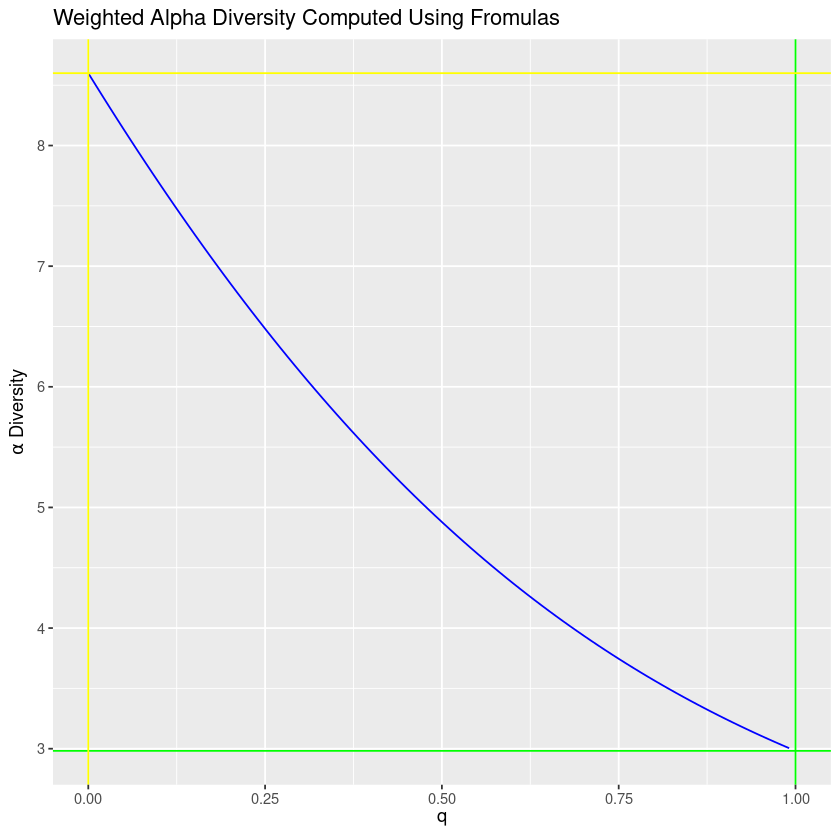

In [28]:
qsum1_a_w_m <- NULL

for (q in range_1) {
  
    df2 <- NULL

    df2 <- alep %>%
      group_by(Habitat) %>% 
      mutate(Habitat_Pop = sum(Count), 
             Prop = Count / Habitat_Pop,
             Weight = Habitat_Pop / Total_Pop,
             Smallqsum = sum((Prop * Weight) ** q),
             q = q) %>%
      ungroup() %>%
      select(Habitat, Smallqsum, Weight, q) %>%
      unique()
    
    suppressMessages(df2 <- df2 %>% 
                       group_by(q) %>% 
                       summarise(Alep_Manual = (sum(Smallqsum) / sum(Weight ** q)) ** (1 / (1 - q)), 
                                 q = q))
    
    qsum1_a_w_m <- rbind(qsum1_a_w_m, df2)
    
}

print(qsum1_a_w_m %>% 
        ggplot(aes(x = q, y = Alep_Manual)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = alep_w_m$Alpha_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = alep_w_m$Alpha_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color = 'yellow') + 
        labs(title = 'Weighted Alpha Diversity Computed Using Fromulas ') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\alpha$ Diversity'))) 

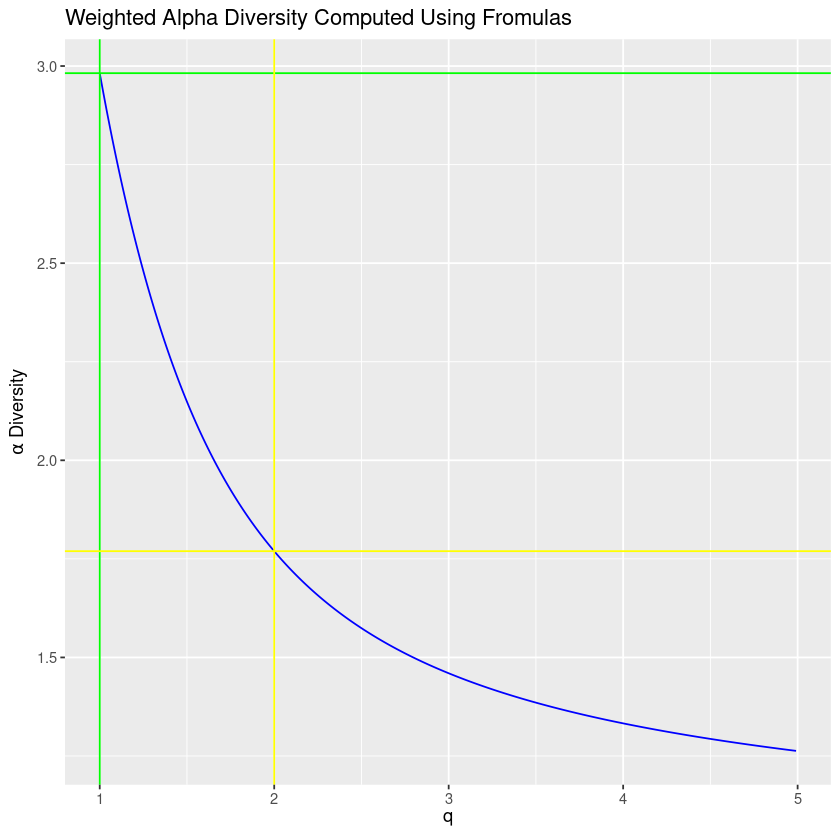

In [29]:
qsum2_a_w_m <- NULL

for (q in range_2) {
    
    df2 <- NULL
    
    df2 <- alep %>%
      group_by(Habitat) %>% 
      mutate(Habitat_Pop = sum(Count), 
             Prop = Count / Habitat_Pop,
             Weight = Habitat_Pop / Total_Pop,
             Smallqsum = sum((Prop * Weight) ** q),
             q = q) %>%
      ungroup() %>%
      select(Habitat, Smallqsum, Weight, q) %>%
      unique()
    
    suppressMessages(df2 <- df2 %>% 
                       group_by(q) %>% 
                       summarise(Alep_Manual = (sum(Smallqsum) / sum(Weight ** q)) ** (1 / (1 - q)), 
                                 q = q))
    
    qsum2_a_w_m <- rbind(qsum2_a_w_m, df2)
    
}

print(qsum2_a_w_m %>% 
        ggplot(aes(x = q, y = Alep_Manual)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = alep_w_m$Alpha_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = alep_w_m$Alpha_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color = 'yellow') + 
        labs(title = 'Weighted Alpha Diversity Computed Using Fromulas ') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\alpha$ Diversity')))  

### Visualizing Unweighted Alpha Diversity Computed Using `vegetarian::d`

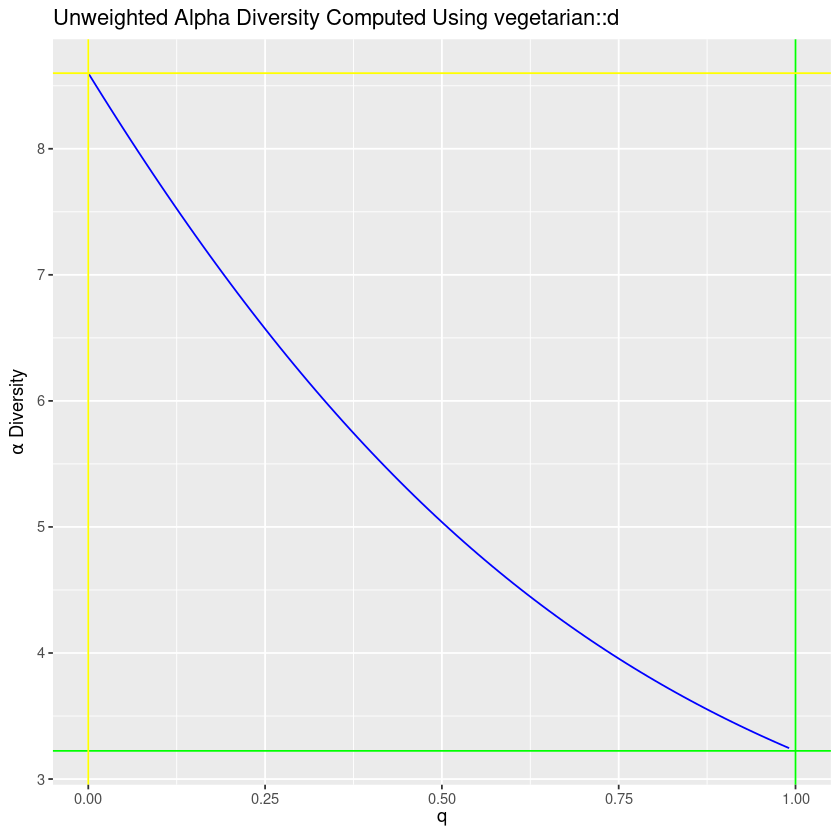

In [30]:
qsum1_a_u_v <- NULL

for (q in range_1) {
  
    df2 <- NULL
    
    df2 <- data.frame(d(df[, -c(1, 2)], lev = 'alpha', q = q), q = q)
    
    names(df2) <- c('Alep_Vegetarian', 'q')
    
    qsum1_a_u_v <- rbind(qsum1_a_u_v, df2)
    
}

print(qsum1_a_u_v %>% 
        ggplot(aes(x = q, y = Alep_Vegetarian)) + 
        geom_line(color = 'blue') +
        geom_hline(yintercept = alep_u_v$Alpha_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color= 'green') + 
        geom_hline(yintercept = alep_u_v$Alpha_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color= 'yellow') + 
        labs(title = 'Unweighted Alpha Diversity Computed Using vegetarian::d') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\alpha$ Diversity'))) 

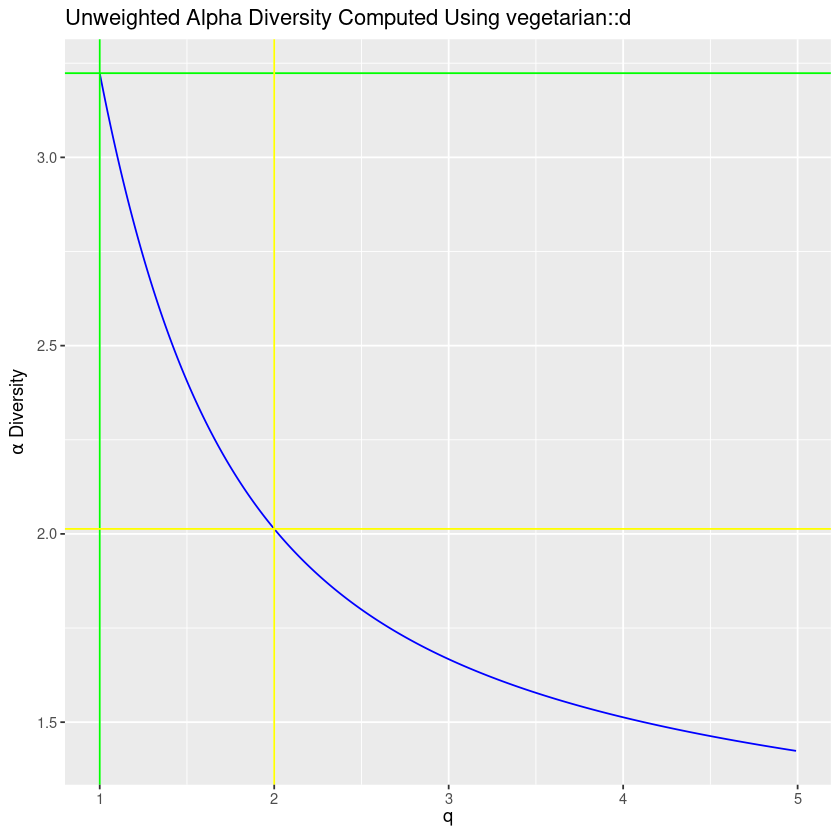

In [31]:
qsum2_a_u_v <- NULL

for (q in range_2) {
  
    df2 <- NULL
    
    df2 <- data.frame(d(df[, -c(1, 2)], lev = 'alpha', q = q), q = q)
    
    names(df2) <- c('Alep_Vegetarian', 'q')
    
    qsum2_a_u_v <- rbind(qsum2_a_u_v, df2)
    
}

print(qsum2_a_u_v %>% 
        ggplot(aes(x = q, y = Alep_Vegetarian)) + 
        geom_line(color = 'blue') +
        geom_hline(yintercept = alep_u_v$Alpha_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color= 'green') + 
        geom_hline(yintercept = alep_u_v$Alpha_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color= 'yellow') + 
        labs(title = 'Unweighted Alpha Diversity Computed Using vegetarian::d') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\alpha$ Diversity'))) 

### Visualizing Weighted Alpha Diversity Computed Using `vegetarian::d``

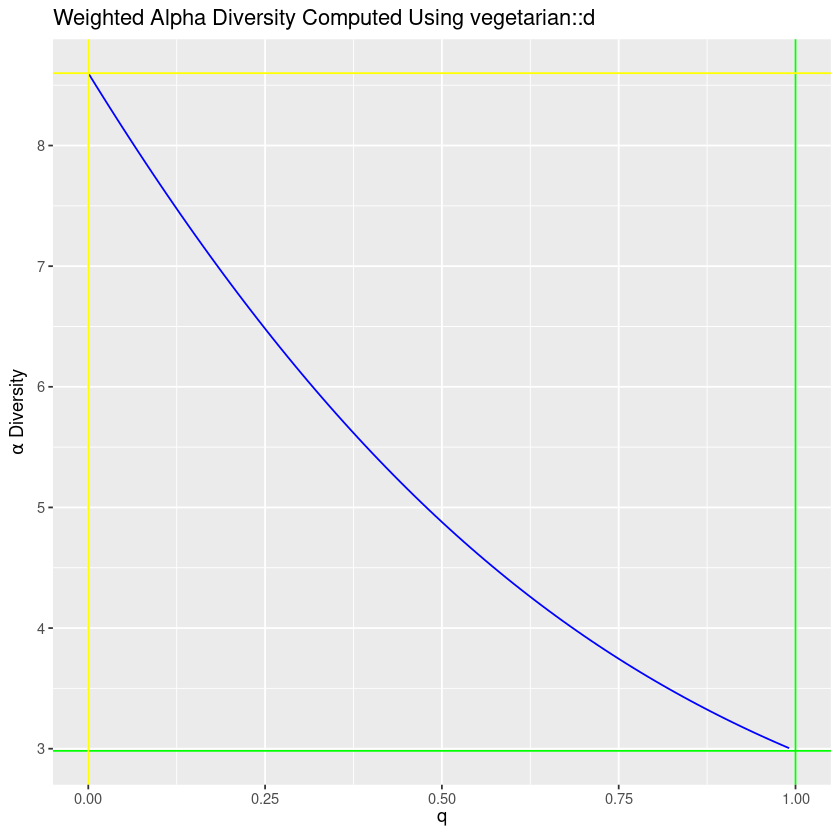

In [32]:
qsum1_a_w_v <- NULL

for (q in range_1) {
  
    df2 <- NULL
    
    df2 <- data.frame(d(df[, -c(1, 2)], lev = 'alpha', wt = df$Weight, q = q), q = q)
    
    names(df2) <- c('Alep_Vegetarian', 'q')
    
    qsum1_a_w_v <- rbind(qsum1_a_w_v, df2)
    
}

print(qsum1_a_w_v %>% 
        ggplot(aes(x = q, y = Alep_Vegetarian)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = alep_w_v$Alpha_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = alep_w_v$Alpha_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color = 'yellow') + 
        labs(title = 'Weighted Alpha Diversity Computed Using vegetarian::d') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\alpha$ Diversity'))) 

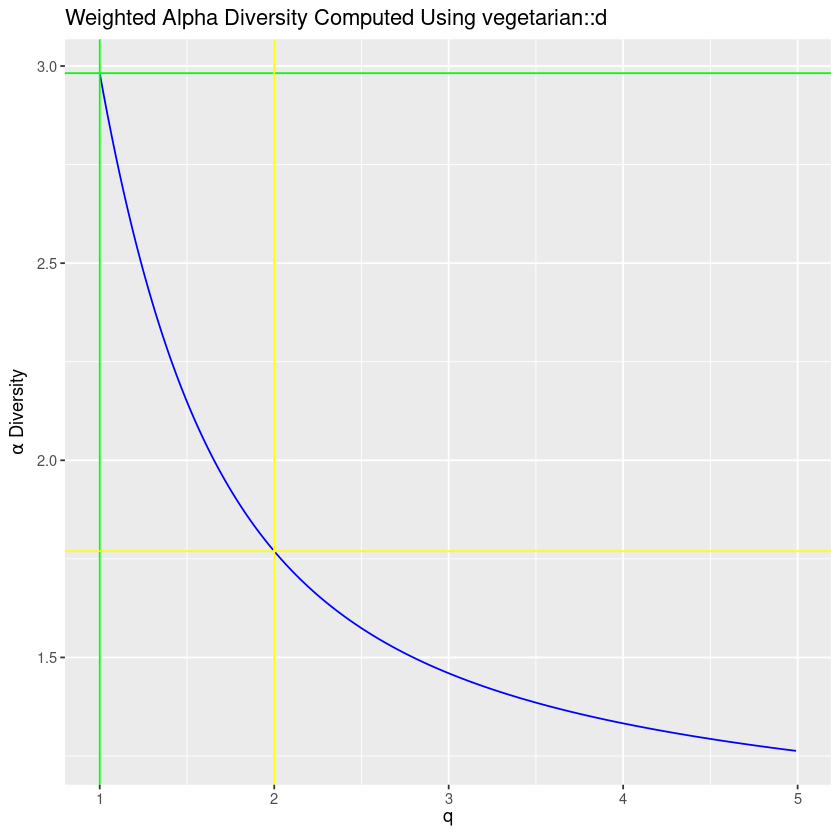

In [33]:
qsum2_a_w_v <- NULL

for (q in range_2) {
    
    df2 <- NULL
    
    df2 <- data.frame(d(df[, -c(1, 2)], lev = 'alpha', wt = df$Weight, q = q), q = q)
    
    names(df2) <- c('Alep_Vegetarian', 'q')
    
    qsum2_a_w_v <- rbind(qsum2_a_w_v, df2)
    
}

print(qsum2_a_w_v %>% 
        ggplot(aes(x = q, y = Alep_Vegetarian)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = alep_w_v$Alpha_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = alep_w_v$Alpha_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color = 'yellow') + 
        labs(title = 'Weighted Alpha Diversity Computed Using vegetarian::d') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\alpha$ Diversity')))  

### Visualizing Unweighted Beta Diversity Computed Using Fromulas

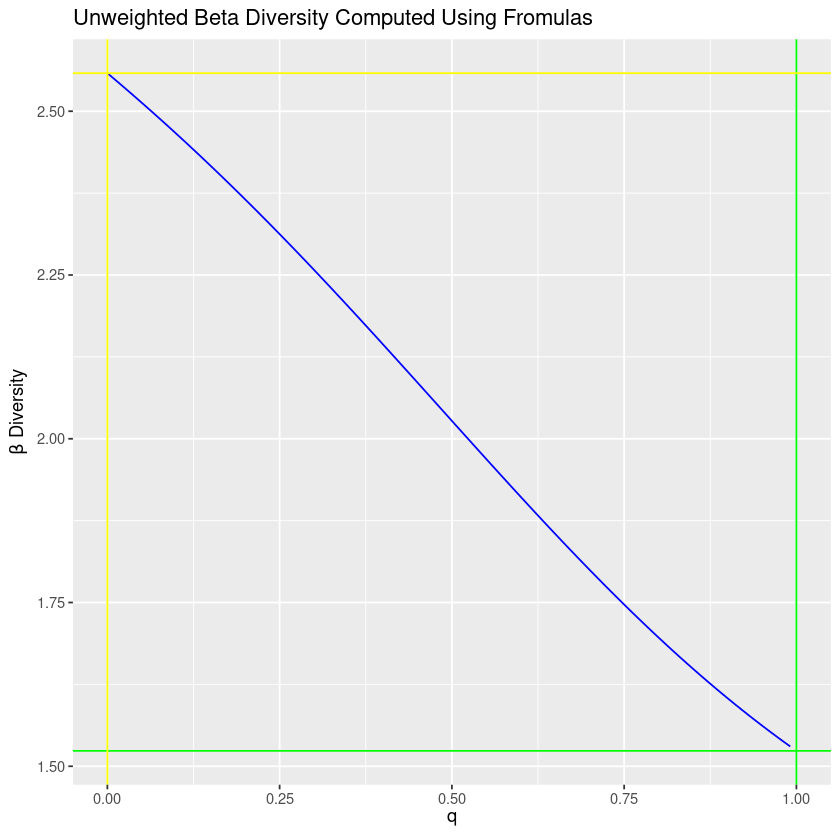

In [34]:
qsum1_b_u_m <- inner_join(qsum1_g_u_m, qsum1_a_u_m, by = 'q')

qsum1_b_u_m <- qsum1_b_u_m %>% mutate(Bet_Manual = Giml_Manual / Alep_Manual)

print(qsum1_b_u_m %>%
        ggplot(aes(x = q, y = Bet_Manual)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = bet_u_m$Beta_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = bet_u_m$Beta_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color = 'yellow') + 
        labs(title = 'Unweighted Beta Diversity Computed Using Fromulas') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\beta$ Diversity')))  

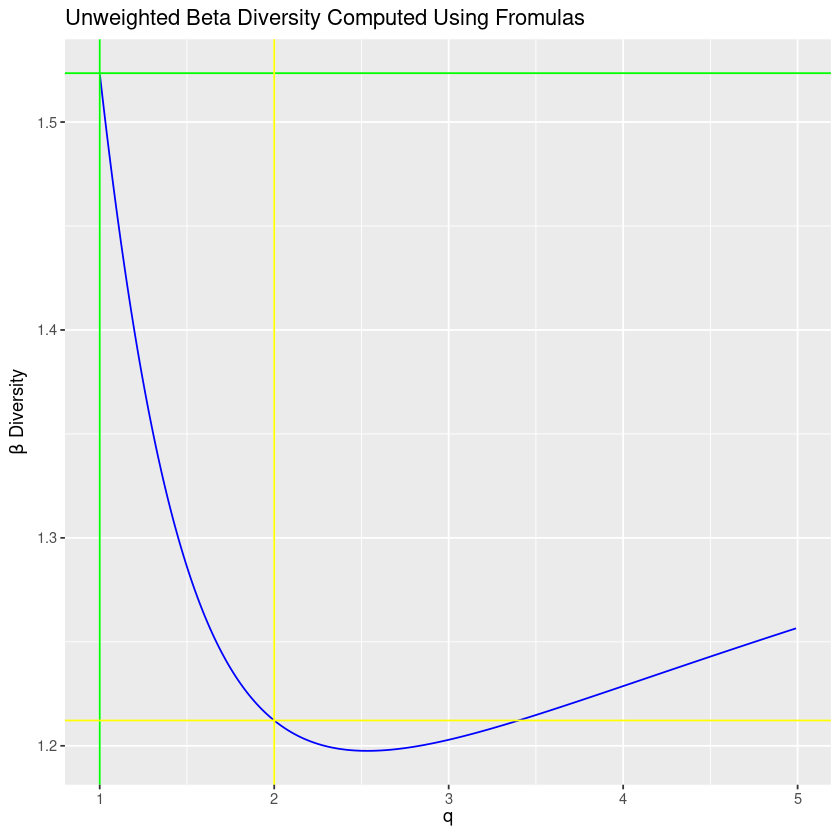

In [35]:
qsum2_b_u_m <- inner_join(qsum2_g_u_m, qsum2_a_u_m, by = 'q')

qsum2_b_u_m <- qsum2_b_u_m %>% mutate(Bet_Manual = Giml_Manual / Alep_Manual)

print(qsum2_b_u_m %>% 
        ggplot(aes(x = q, y = Bet_Manual)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = bet_u_m$Beta_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = bet_u_m$Beta_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color = 'yellow') + 
        labs(title = 'Unweighted Beta Diversity Computed Using Fromulas') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\beta$ Diversity')))  

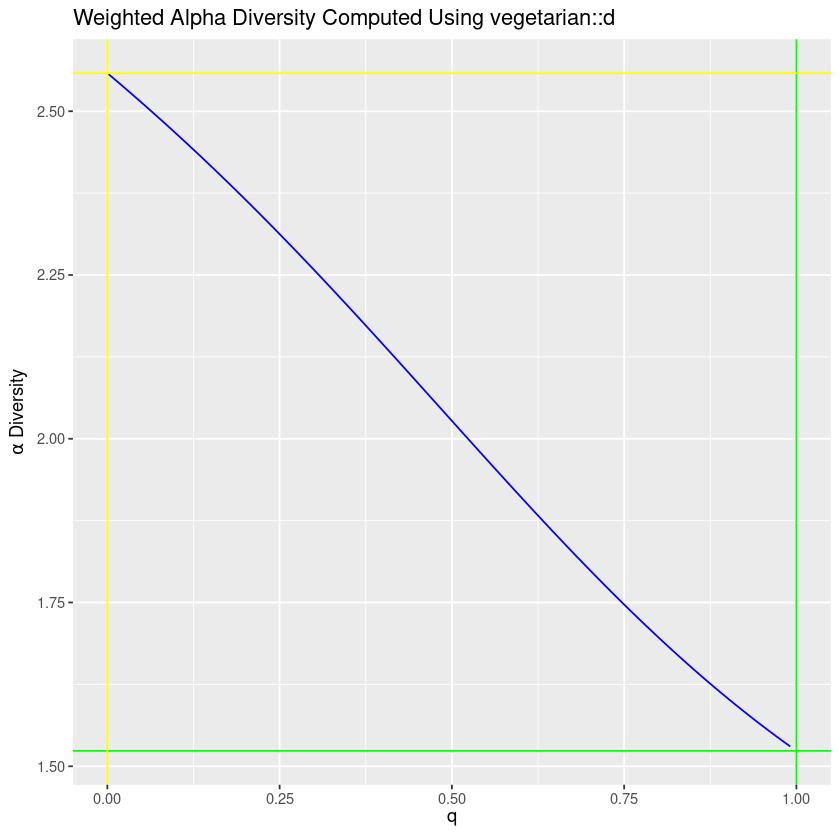

In [36]:
# alternatively
qsum1_b_u_v <- NULL

for (q in range_1) {
  
    df2 <- NULL
    
    df2 <- data.frame(d(df[, -c(1, 2)], lev = 'beta', q = q), q = q)
    
    names(df2) <- c('Bet_Vegetarian', 'q')
    
    qsum1_b_u_v <- rbind(qsum1_b_u_v, df2)
    
}

print(qsum1_b_u_v %>% 
        ggplot(aes(x = q, y = Bet_Vegetarian)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = bet_u_v$Beta_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = bet_u_v$Beta_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color = 'yellow') + 
        labs(title = 'Weighted Alpha Diversity Computed Using vegetarian::d') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\alpha$ Diversity'))) 

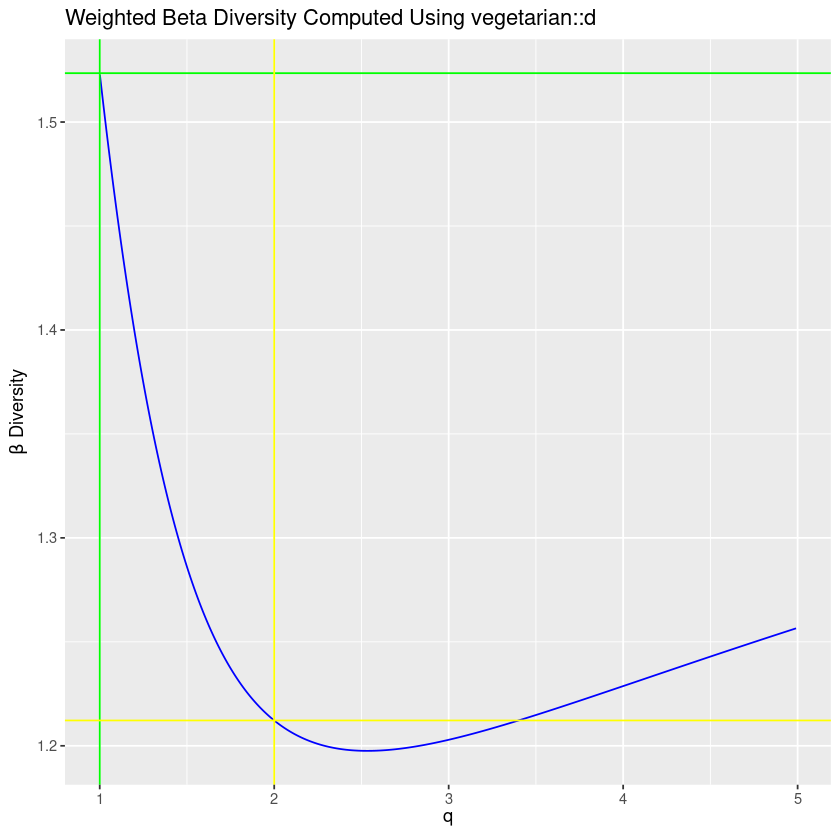

In [37]:
# alternatively
qsum2_b_u_v <- NULL

for (q in range_2) {
    
    df2 <- NULL
    
    df2 <- data.frame(d(df[, -c(1, 2)], lev = 'beta', q = q), q = q)
    
    names(df2) <- c('Bet_Vegetarian', 'q')
    
    qsum2_b_u_v <- rbind(qsum2_b_u_v, df2)
    
}

print(qsum2_b_u_v %>% 
        ggplot(aes(x = q, y = Bet_Vegetarian)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = bet_u_v$Beta_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = bet_u_v$Beta_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color = 'yellow') + 
        labs(title = 'Weighted Beta Diversity Computed Using vegetarian::d') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\beta$ Diversity')))  

### Visualizing Weighted Beta Diversity Computed Using Fromulas

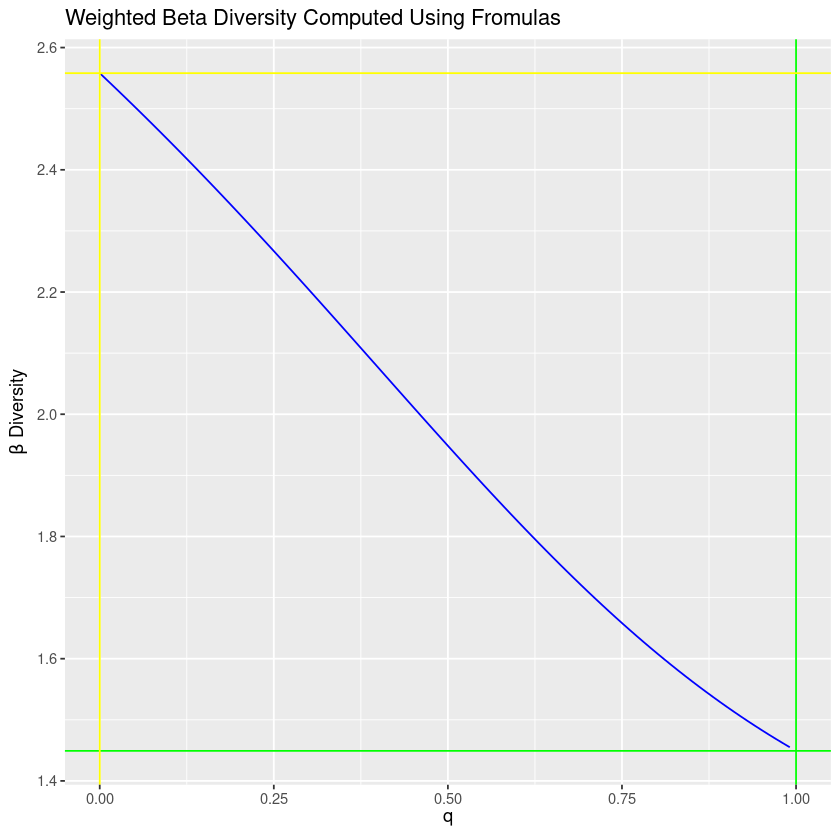

In [38]:
qsum1_b_w_m <- inner_join(qsum1_g_w_m, qsum1_a_w_m, by = 'q')

qsum1_b_w_m <- qsum1_b_w_m %>% mutate(Bet_Manual = Giml_Manual / Alep_Manual)

print(qsum1_b_w_m %>% 
        ggplot(aes(x = q, y = Bet_Manual)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = bet_w_m$Beta_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = bet_w_m$Beta_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color = 'yellow') + 
        labs(title = 'Weighted Beta Diversity Computed Using Fromulas') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\beta$ Diversity')))  

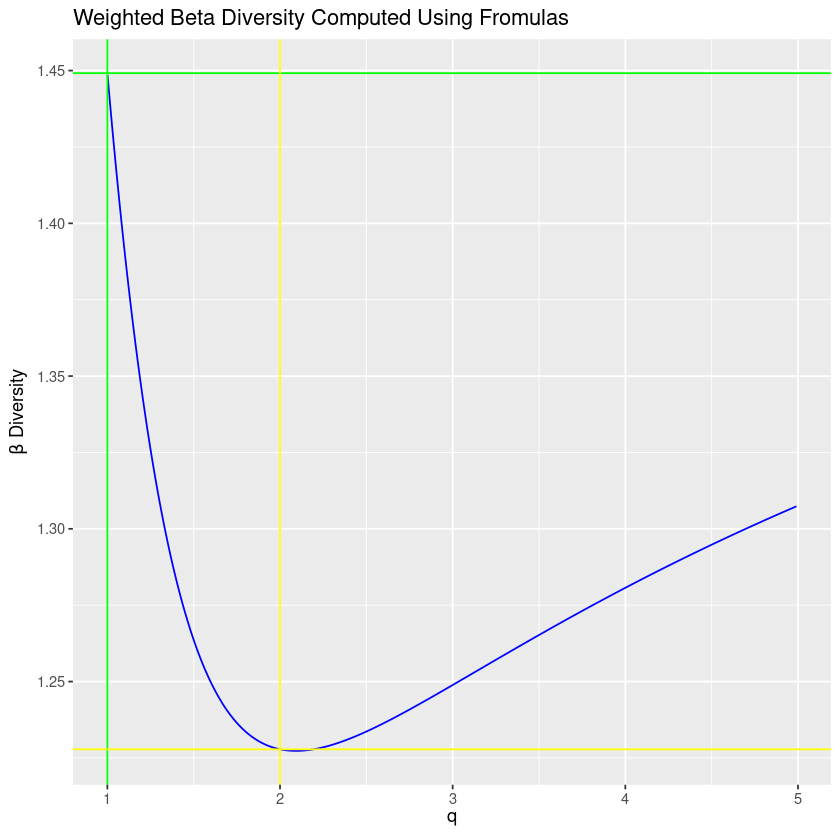

In [39]:
qsum2_b_w_m <- inner_join(qsum2_g_w_m, qsum2_a_w_m, by = 'q')

qsum2_b_w_m <- qsum2_b_w_m %>% mutate(Bet_Manual = Giml_Manual / Alep_Manual)

print(qsum2_b_w_m %>% 
        ggplot(aes(x = q, y = Bet_Manual)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = bet_w_m$Beta_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = bet_w_m$Beta_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color = 'yellow') + 
        labs(title = 'Weighted Beta Diversity Computed Using Fromulas') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\beta$ Diversity')))  

### Visualizing Unweighted Beta Diversity Computed Using `vegetarian::d`

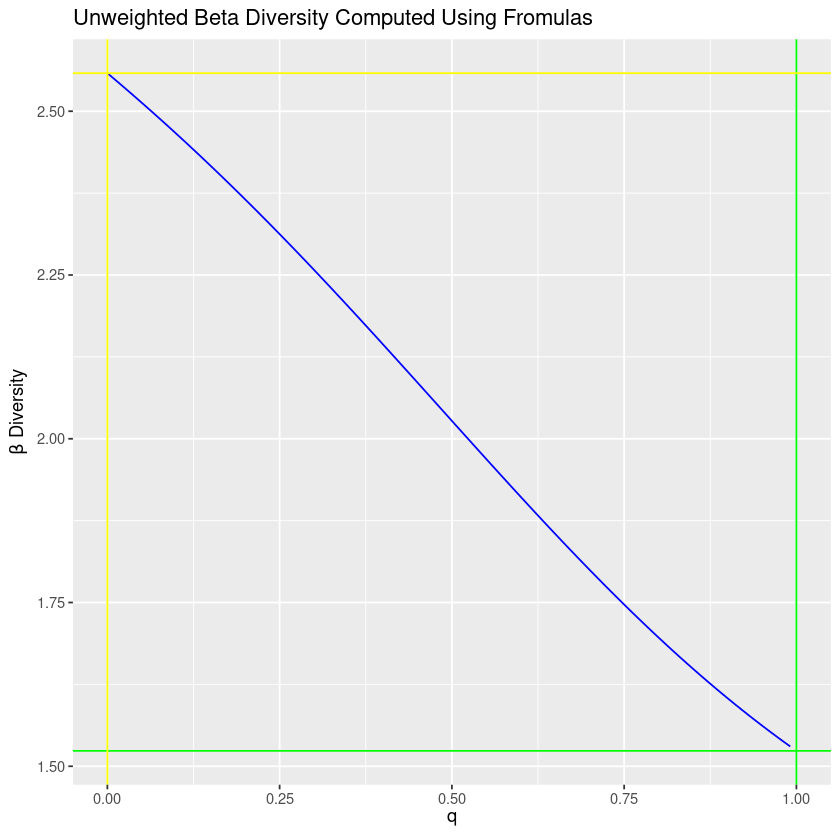

In [40]:
qsum1_b_u_v <- inner_join(qsum1_g_u_v, qsum1_a_u_v, by = 'q')

qsum1_b_u_v <- qsum1_b_u_v %>% mutate(Bet_Vegetarian = Giml_Vegetarian / Alep_Vegetarian)

print(qsum1_b_u_v %>% 
        ggplot(aes(x = q, y = Bet_Vegetarian)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = bet_u_v$Beta_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = bet_u_v$Beta_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color = 'yellow') + 
        labs(title = 'Unweighted Beta Diversity Computed Using Fromulas') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\beta$ Diversity')))  

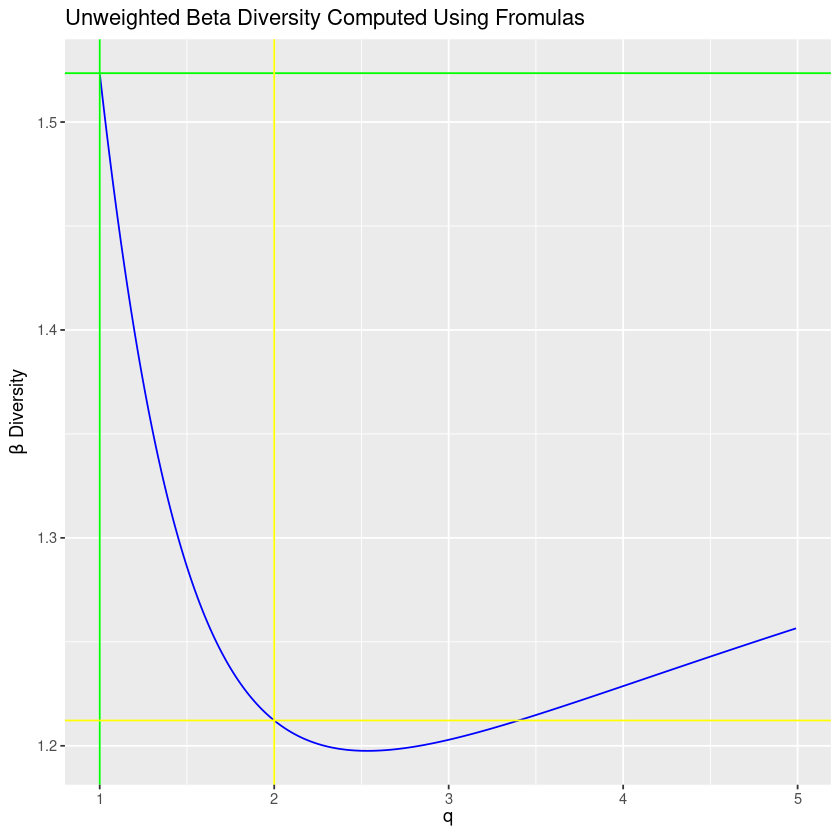

In [41]:
qsum2_b_u_v <- inner_join(qsum2_g_u_v, qsum2_a_u_v, by = 'q')

qsum2_b_u_v <- qsum2_b_u_v %>% mutate(Bet_Vegetarian = Giml_Vegetarian / Alep_Vegetarian)

print(qsum2_b_u_v %>%
        ggplot(aes(x = q, y = Bet_Vegetarian)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = bet_u_v$Beta_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = bet_u_v$Beta_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color = 'yellow') + 
        labs(title = 'Unweighted Beta Diversity Computed Using Fromulas') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\beta$ Diversity')))  

### Visualizing Weighted Beta Diversity Computed Using `vegetarian::d`

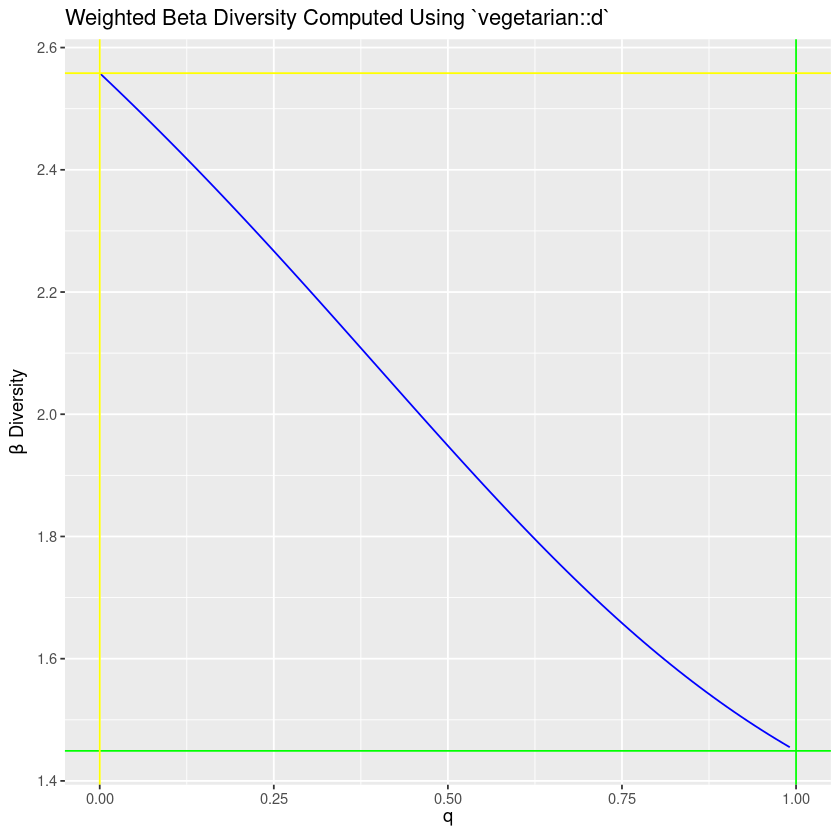

In [42]:
qsum1_b_w_v <- inner_join(qsum1_g_w_v, qsum1_a_w_v, by = 'q')

qsum1_b_w_v <- qsum1_b_w_v %>% mutate(Bet_Vegetarian = Giml_Vegetarian / Alep_Vegetarian)

print(qsum1_b_w_v %>% 
        ggplot(aes(x = q, y = Bet_Vegetarian)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = bet_w_v$Beta_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = bet_w_v$Beta_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color = 'yellow') + 
        labs(title = 'Weighted Beta Diversity Computed Using `vegetarian::d`') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\beta$ Diversity')))  

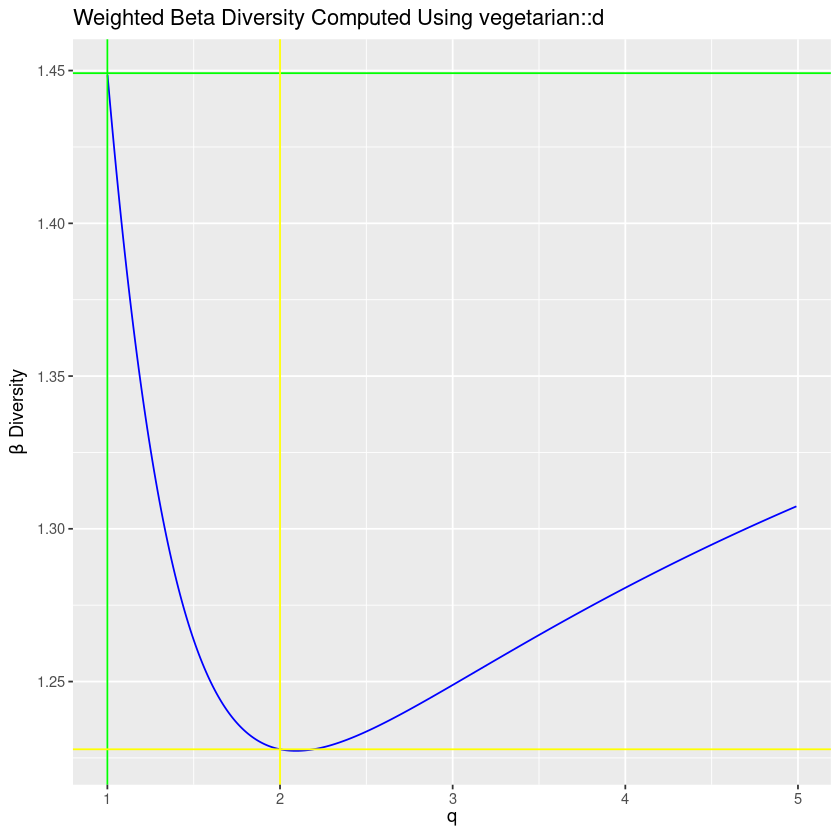

In [43]:
qsum2_b_w_v <- inner_join(qsum2_g_w_v, qsum2_a_w_v, by = 'q')

qsum2_b_w_v <- qsum2_b_w_v %>% mutate(Bet_Vegetarian = Giml_Vegetarian / Alep_Vegetarian)

print(qsum2_b_w_v %>% 
        ggplot(aes(x = q, y = Bet_Vegetarian)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = bet_w_v$Beta_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = bet_w_v$Beta_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color = 'yellow') + 
        labs(title = 'Weighted Beta Diversity Computed Using vegetarian::d') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\beta$ Diversity')))  

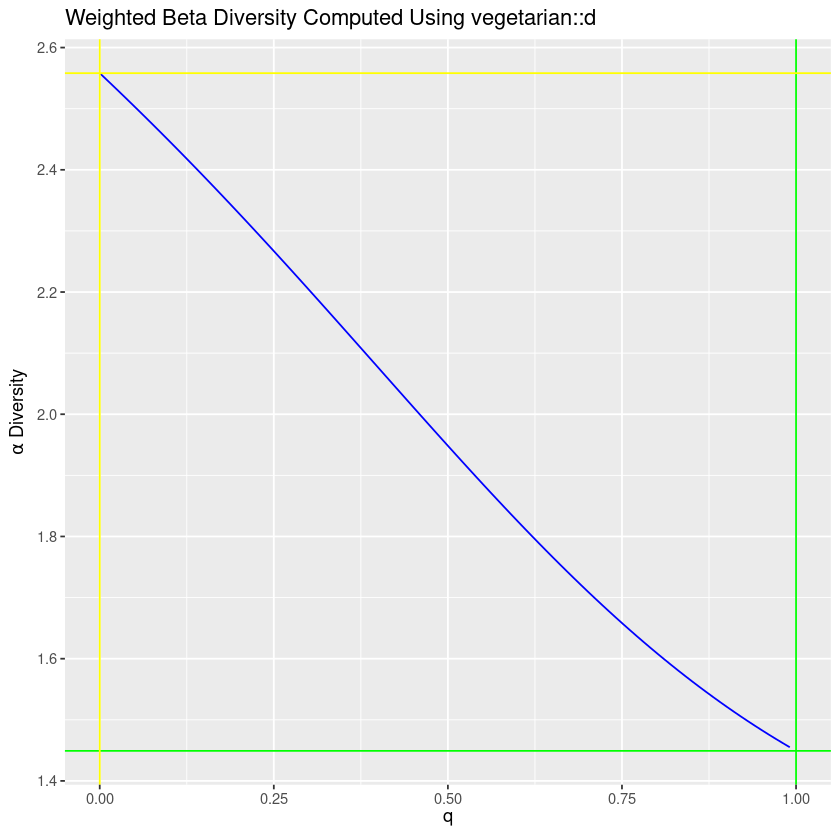

In [44]:
# alternatively
qsum1_b_w_v <- NULL

for (q in range_1) {
  
    df2 <- NULL
    
    df2 <- data.frame(d(df[, -c(1, 2)], lev = 'beta', wt = df$Weight, q = q), q = q)
    
    names(df2) <- c('Bet_Vegetarian', 'q')
    
    qsum1_b_w_v <- rbind(qsum1_b_w_v, df2)
    
}

print(qsum1_b_w_v %>% 
        ggplot(aes(x = q, y = Bet_Vegetarian)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = bet_w_v$Beta_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = bet_w_v$Beta_Richness, color = 'yellow') +
        geom_vline(xintercept = 0, color = 'yellow') + 
        labs(title = 'Weighted Beta Diversity Computed Using vegetarian::d') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\alpha$ Diversity'))) 

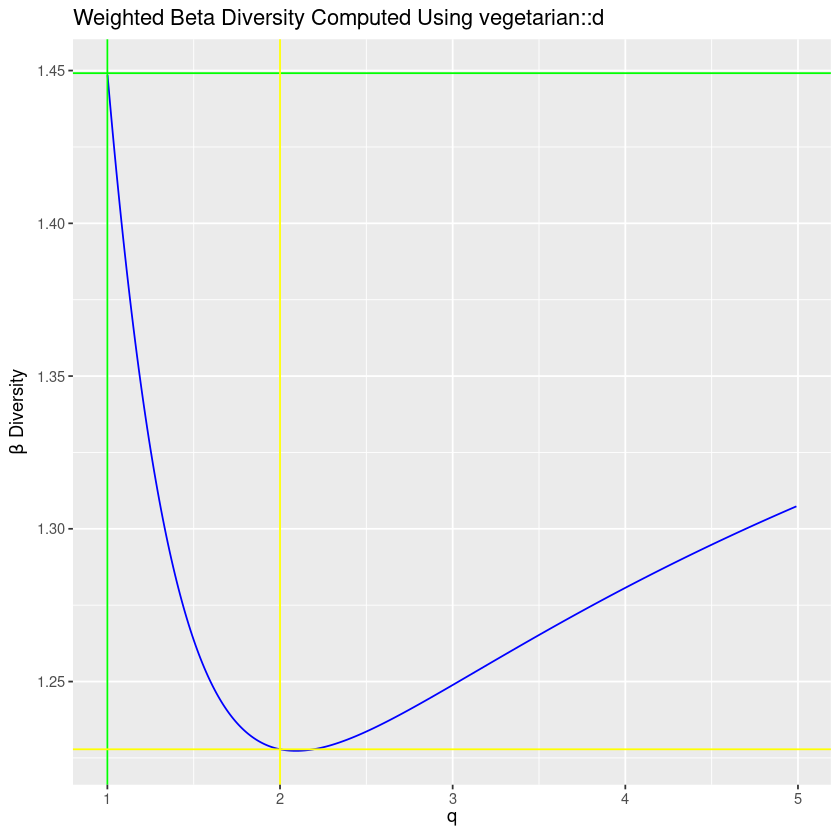

In [45]:
# alternatively
qsum2_b_w_v <- NULL

for (q in range_2) {

    df2 <- NULL

    df2 <- data.frame(d(df[, -c(1, 2)], lev = 'beta', wt = df$Weight, q = q), q = q)

    names(df2) <- c('Bet_Vegetarian', 'q')

    qsum2_b_w_v <- rbind(qsum2_b_w_v, df2)
    
}

print(qsum2_b_w_v %>% 
        ggplot(aes(x = q, y = Bet_Vegetarian)) + 
        geom_line( color = 'blue') + 
        geom_hline(yintercept = bet_w_v$Beta_Shannon, color = 'green') +
        geom_vline(xintercept = 1, color = 'green') + 
        geom_hline(yintercept = bet_w_v$Beta_Greenberg, color = 'yellow') +
        geom_vline(xintercept = 2, color = 'yellow') + 
        labs(title = 'Weighted Beta Diversity Computed Using vegetarian::d') +
        xlab(TeX('$q$')) +
        ylab(TeX('$\\beta$ Diversity')))     